In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [3]:
raw_data = pd.read_csv('cirrhosis.csv')
raw_data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


'Status' is the target. Let's move it to the end of the dataframe.

In [4]:
raw_data.columns.values

array(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides',
       'Platelets', 'Prothrombin', 'Stage'], dtype=object)

In [5]:
columns_reordered = ['ID', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides',
       'Platelets', 'Prothrombin', 'Stage',  'Status']

In [6]:
data = raw_data.copy()
data = data[columns_reordered]
data.head()

,ID,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,1,400,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,D
1,2,4500,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,C
2,3,1012,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,D
3,4,1925,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,D
4,5,1504,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,CL


## Null value Handling

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

There are 418 observations in the dataset.

In [8]:
data = data.drop('ID', axis=1)

Let's find the total number of null values per feature 

In [9]:
data.isnull().sum()

N_Days             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
Status             0
dtype: int64

Now, let's find these null values as a perteng of the total data.

In [10]:
(data.isnull().sum()/len(data))*100

N_Days            0.000000
Drug             25.358852
Age               0.000000
Sex               0.000000
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Edema             0.000000
Bilirubin         0.000000
Cholesterol      32.057416
Albumin           0.000000
Copper           25.837321
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             1.435407
Status            0.000000
dtype: float64

### What are the different approaches to null value handling?

Approach 1: Drop the row that has missing values.

Approach 2: Drop the entire column if most of the values in the column has missing values.

Approach 3: Impute the missing data, that is, fill in the missing values with appropriate values.

Approach 4: Use an ML algorithm that handles missing values on its own, internally (ex: XGBoost).

#

In [11]:
# dropping rows with null values

updated_data = data.dropna(axis=0)

In [12]:
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 311
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         276 non-null    int64  
 1   Drug           276 non-null    object 
 2   Age            276 non-null    int64  
 3   Sex            276 non-null    object 
 4   Ascites        276 non-null    object 
 5   Hepatomegaly   276 non-null    object 
 6   Spiders        276 non-null    object 
 7   Edema          276 non-null    object 
 8   Bilirubin      276 non-null    float64
 9   Cholesterol    276 non-null    float64
 10  Albumin        276 non-null    float64
 11  Copper         276 non-null    float64
 12  Alk_Phos       276 non-null    float64
 13  SGOT           276 non-null    float64
 14  Tryglicerides  276 non-null    float64
 15  Platelets      276 non-null    float64
 16  Prothrombin    276 non-null    float64
 17  Stage          276 non-null    float64
 18  Status         

In [13]:
((418-276)/418)*100

33.97129186602871

We lose significant amount of data. Hence this is not a good method.

### Imputation

**Approach 1:** Impute with a constant number 

a) For numeric data:

-> Fill with 0 

-> Mean of entire column excluding the missing values

-> Median of entire column excluding the missing values

-> Mean or median of only those rows (of the variable) that has the same value of Y as the missing.

b) For categorical data:

-> Fill with a new label

-> Fill it with the most frequent data (mode)

**Approach 2:** Predict the missing value with machine learning using other non-missing columns as predictors.

In [14]:
# filling with 0

df_a1 = data.copy()

In [15]:
df_a1['Cholesterol'] = df_a1['Cholesterol'].fillna(0)
df_a1['Copper'] = df_a1['Copper'].fillna(0)
df_a1['Alk_Phos'] = df_a1['Alk_Phos'].fillna(0)
df_a1['SGOT'] = df_a1['SGOT'].fillna(0)
df_a1['Tryglicerides'] = df_a1['Tryglicerides'].fillna(0)
df_a1['Platelets'] = df_a1['Platelets'].fillna(0)
df_a1['Prothrombin'] = df_a1['Prothrombin'].fillna(0)

df_a1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Drug           312 non-null    object 
 2   Age            418 non-null    int64  
 3   Sex            418 non-null    object 
 4   Ascites        312 non-null    object 
 5   Hepatomegaly   312 non-null    object 
 6   Spiders        312 non-null    object 
 7   Edema          418 non-null    object 
 8   Bilirubin      418 non-null    float64
 9   Cholesterol    418 non-null    float64
 10  Albumin        418 non-null    float64
 11  Copper         418 non-null    float64
 12  Alk_Phos       418 non-null    float64
 13  SGOT           418 non-null    float64
 14  Tryglicerides  418 non-null    float64
 15  Platelets      418 non-null    float64
 16  Prothrombin    418 non-null    float64
 17  Stage          412 non-null    float64
 18  Status    

Now, we have a dataframe called **df_a1** that has all the missing values in numerical features filled with 0. Let's fill the missing values in categorical variables.

In [16]:
df_a1_b1 = df_a1.copy()

In [17]:
# filling with new label

df_a1_b1['Drug'] = df_a1_b1['Drug'].fillna('Empty')
df_a1_b1['Ascites'] = df_a1_b1['Ascites'].fillna('Empty')
df_a1_b1['Hepatomegaly'] = df_a1_b1['Hepatomegaly'].fillna('Empty')
df_a1_b1['Spiders'] = df_a1_b1['Spiders'].fillna('Empty')
df_a1_b1['Stage'] = df_a1_b1['Stage'].fillna('Empty')

df_a1_b1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Drug           418 non-null    object 
 2   Age            418 non-null    int64  
 3   Sex            418 non-null    object 
 4   Ascites        418 non-null    object 
 5   Hepatomegaly   418 non-null    object 
 6   Spiders        418 non-null    object 
 7   Edema          418 non-null    object 
 8   Bilirubin      418 non-null    float64
 9   Cholesterol    418 non-null    float64
 10  Albumin        418 non-null    float64
 11  Copper         418 non-null    float64
 12  Alk_Phos       418 non-null    float64
 13  SGOT           418 non-null    float64
 14  Tryglicerides  418 non-null    float64
 15  Platelets      418 non-null    float64
 16  Prothrombin    418 non-null    float64
 17  Stage          418 non-null    object 
 18  Status    

We have a dataframe called df_a1_b1 which has all the missing values in categorical features have been replaced by 'Empty', and in numerical features have been replaced by 0.

Replacing with mean for numerical features and replacing with the most frequent label for categorical features 

In [18]:
df_a2_b2 = data.copy()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Drug           312 non-null    object 
 2   Age            418 non-null    int64  
 3   Sex            418 non-null    object 
 4   Ascites        312 non-null    object 
 5   Hepatomegaly   312 non-null    object 
 6   Spiders        312 non-null    object 
 7   Edema          418 non-null    object 
 8   Bilirubin      418 non-null    float64
 9   Cholesterol    284 non-null    float64
 10  Albumin        418 non-null    float64
 11  Copper         310 non-null    float64
 12  Alk_Phos       312 non-null    float64
 13  SGOT           312 non-null    float64
 14  Tryglicerides  282 non-null    float64
 15  Platelets      407 non-null    float64
 16  Prothrombin    416 non-null    float64
 17  Stage          412 non-null    float64
 18  Status    

In [20]:
df_a2_b2['Cholesterol'] = df_a2_b2['Cholesterol'].fillna(data['Cholesterol'].mean())
df_a2_b2['Copper'] = df_a2_b2['Copper'].fillna(data['Copper'].mean())
df_a2_b2['Alk_Phos'] = df_a2_b2['Alk_Phos'].fillna(data['Alk_Phos'].mean())
df_a2_b2['SGOT'] = df_a2_b2['SGOT'].fillna(data['SGOT'].mean())
df_a2_b2['Tryglicerides'] = df_a2_b2['Tryglicerides'].fillna(data['Tryglicerides'].mean())
df_a2_b2['Platelets'] = df_a2_b2['Platelets'].fillna(data['Platelets'].mean())
df_a2_b2['Prothrombin'] = df_a2_b2['Prothrombin'].fillna(data['Prothrombin'].mean())

df_a2_b2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Drug           312 non-null    object 
 2   Age            418 non-null    int64  
 3   Sex            418 non-null    object 
 4   Ascites        312 non-null    object 
 5   Hepatomegaly   312 non-null    object 
 6   Spiders        312 non-null    object 
 7   Edema          418 non-null    object 
 8   Bilirubin      418 non-null    float64
 9   Cholesterol    418 non-null    float64
 10  Albumin        418 non-null    float64
 11  Copper         418 non-null    float64
 12  Alk_Phos       418 non-null    float64
 13  SGOT           418 non-null    float64
 14  Tryglicerides  418 non-null    float64
 15  Platelets      418 non-null    float64
 16  Prothrombin    418 non-null    float64
 17  Stage          412 non-null    float64
 18  Status    

In [21]:
df_a2_b2['Drug'] = df_a2_b2.fillna(df_a2_b2['Drug'].value_counts().index[0]) 
df_a2_b2['Ascites'] = df_a2_b2.fillna(df_a2_b2['Ascites'].value_counts().index[0]) 
df_a2_b2['Hepatomegaly'] = df_a2_b2.fillna(df_a2_b2['Hepatomegaly'].value_counts().index[0]) 
df_a2_b2['Spiders'] = df_a2_b2.fillna(df_a2_b2['Spiders'].value_counts().index[0]) 
df_a2_b2['Stage'] = df_a2_b2.fillna(df_a2_b2['Stage'].value_counts().index[0]) 

ValueError: Columns must be same length as key

In [ ]:
df_a2_b2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Drug           418 non-null    object 
 2   Age            418 non-null    int64  
 3   Sex            418 non-null    object 
 4   Ascites        418 non-null    object 
 5   Hepatomegaly   418 non-null    object 
 6   Spiders        418 non-null    object 
 7   Edema          418 non-null    object 
 8   Bilirubin      418 non-null    float64
 9   Cholesterol    418 non-null    float64
 10  Albumin        418 non-null    float64
 11  Copper         418 non-null    float64
 12  Alk_Phos       418 non-null    float64
 13  SGOT           418 non-null    float64
 14  Tryglicerides  418 non-null    float64
 15  Platelets      418 non-null    float64
 16  Prothrombin    418 non-null    float64
 17  Stage          418 non-null    object 
 18  Status    

# Outlier Handling

We use box-plots.  
Lower Limit = Q1 - 1.5 * IQR  
Upper Limit = Q3 + 1.5 * IQR

N_Days:

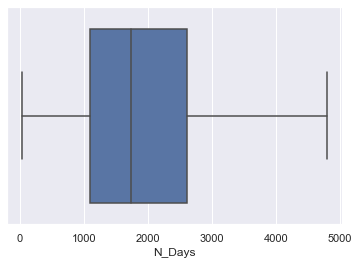

In [ ]:
sns.boxplot(x=df_a2_b2['N_Days'])

Age:

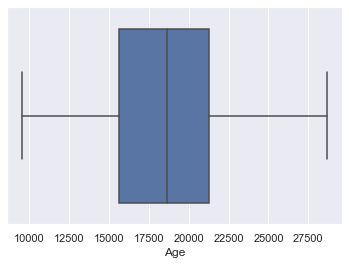

In [ ]:
sns.boxplot(x=df_a2_b2['Age'])

cholesterol:

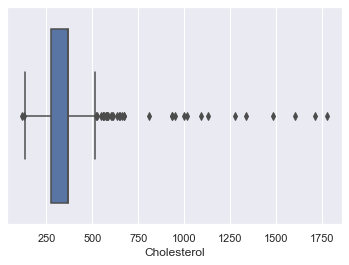

In [ ]:
sns.boxplot(x=df_a2_b2['Cholesterol'])

In [ ]:
Q1 = df_a2_b2['Cholesterol'].quantile(0.25)
Q3 = df_a2_b2['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Cholesterol_outliers = df_a2_b2[(df_a2_b2['Cholesterol'] < Q1 - whisker_width*IQR) | (df_a2_b2['Cholesterol'] > Q3 + whisker_width*IQR)]
Cholesterol_outliers

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
8,2400,2400,15526,F,2400,2400,2400,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2400,D
25,1444,1444,19002,F,1444,1444,1444,N,5.2,1128.0,3.68,53.0,3228.0,165.85,166.0,421.0,9.9,1444,D
51,2386,2386,18460,M,2386,2386,2386,N,6.0,614.0,3.70,158.0,5084.4,206.40,93.0,362.0,10.6,2386,D
59,4365,4365,21324,F,4365,4365,4365,N,0.9,604.0,3.40,82.0,876.0,71.30,58.0,228.0,10.3,4365,C
62,859,859,17031,F,859,859,859,Y,22.5,932.0,3.12,95.0,5396.0,244.90,133.0,165.0,11.6,859,D
68,1170,1170,18021,F,1170,1170,1170,S,20.0,652.0,3.46,159.0,3292.0,215.45,184.0,227.0,12.4,1170,D
73,1827,1827,18964,F,1827,1827,1827,N,8.4,558.0,3.99,280.0,967.0,89.90,309.0,278.0,11.0,1827,D
74,1191,1191,15895,F,1191,1191,1191,S,17.1,674.0,2.53,207.0,2078.0,182.90,598.0,268.0,11.5,1191,D
85,1657,1657,19270,F,1657,1657,1657,N,5.0,1600.0,3.21,75.0,2656.0,82.15,174.0,181.0,10.9,1657,D
89,2689,2689,12227,M,2689,2689,2689,N,1.6,660.0,4.22,94.0,1857.0,151.90,155.0,337.0,11.0,2689,D


In [ ]:
Cholesterol_mean = df_a2_b2['Cholesterol'].mean()
Cholesterol_std = df_a2_b2['Cholesterol'].std()
low= Cholesterol_mean -(3 * Cholesterol_std)
high= Cholesterol_mean + (3 * Cholesterol_std)
Cholesterol_outliers = df_a2_b2[(df_a2_b2['Cholesterol'] < low) | (df_a2_b2['Cholesterol'] > high)]
Cholesterol_outliers

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
25,1444,1444,19002,F,1444,1444,1444,N,5.2,1128.0,3.68,53.0,3228.0,165.85,166.0,421.0,9.9,1444,D
85,1657,1657,19270,F,1657,1657,1657,N,5.0,1600.0,3.21,75.0,2656.0,82.15,174.0,181.0,10.9,1657,D
116,1083,1083,18137,F,1083,1083,1083,N,6.5,950.0,3.11,111.0,2374.0,170.50,149.0,354.0,11.0,1083,D
129,1413,1413,16154,F,1413,1413,1413,N,17.4,1775.0,3.43,205.0,2065.0,165.85,97.0,418.0,11.5,1413,D
147,1427,1427,11273,F,1427,1427,1427,N,7.2,1015.0,3.26,247.0,3836.0,198.40,280.0,330.0,9.8,1427,D
165,2721,2721,15105,F,2721,2721,2721,N,5.7,1480.0,3.26,84.0,1960.0,457.25,108.0,213.0,9.5,2721,C
190,216,216,19246,F,216,216,216,N,24.5,1092.0,3.35,233.0,3740.0,147.25,432.0,399.0,15.2,216,D
214,1080,1080,15037,F,1080,1080,1080,N,5.9,1276.0,3.85,141.0,1204.0,203.05,157.0,216.0,10.7,1080,D
234,1882,1882,12120,F,1882,1882,1882,N,13.0,1336.0,4.16,71.0,3510.0,209.25,111.0,338.0,11.9,1882,C
246,732,732,15056,F,732,732,732,N,6.1,1712.0,2.83,89.0,3681.0,158.10,139.0,297.0,10.0,732,CL


In [ ]:
df_a2_b2 = df_a2_b2.drop('Cholesterol', axis=1)

Albumin:

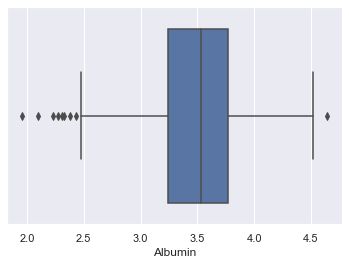

In [ ]:
sns.boxplot(x=df_a2_b2['Albumin'])

In [ ]:
Q1 = df_a2_b2['Albumin'].quantile(0.25)
Q3 = df_a2_b2['Albumin'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Albumin_outliers = df_a2_b2[(df_a2_b2['Albumin'] < Q1 - whisker_width*IQR) | (df_a2_b2['Albumin'] > Q3 + whisker_width*IQR)]
Albumin_outliers.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
13,1217,1217,20535,M,1217,1217,1217,Y,0.8,2.27,43.0,728.0,71.00,124.702128,156.0,11.0,1217,D
69,3458,3458,20600,F,3458,3458,3458,N,0.6,4.64,20.0,666.0,54.25,124.702128,265.0,10.6,3458,C
222,334,334,22369,F,334,334,334,Y,14.1,2.43,123.0,1833.0,134.00,155.000000,210.0,11.0,334,D
230,1165,1165,21307,F,1165,1165,1165,N,3.4,1.96,115.0,2250.0,203.05,90.000000,190.0,10.7,1165,D
266,179,179,25899,F,179,179,179,Y,6.6,2.33,138.0,620.0,106.00,91.000000,195.0,12.1,179,D


In [ ]:
Albumin_mean = df_a2_b2['Albumin'].mean()
Albumin_std = df_a2_b2['Albumin'].std()
low= Albumin_mean -(3 * Albumin_std)
high= Albumin_mean + (3 * Albumin_std)
Albumin_outliers = df_a2_b2[(df_a2_b2['Albumin'] < low) | (df_a2_b2['Albumin'] > high)]
Albumin_outliers

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
230,1165,1165,21307,F,1165,1165,1165,N,3.4,1.96,115.0,2250.0,203.05,90.0,190.0,10.7,1165,D
280,41,41,24064,F,41,41,41,Y,17.9,2.10,220.0,705.0,338.00,229.0,62.0,12.9,41,D


In [ ]:
Q1 = df_a2_b2['Albumin'].quantile(0.25)
Q3 = df_a2_b2['Albumin'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df_a2_b2['Albumin']=np.where(df_a2_b2['Albumin']>upper_whisker,upper_whisker,
                       np.where(df_a2_b2['Albumin']<lower_whisker,lower_whisker,
                                df_a2_b2['Albumin']))

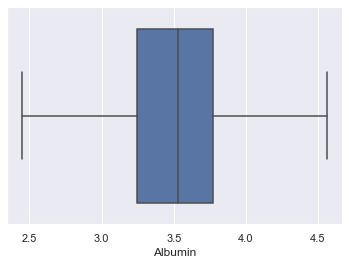

In [ ]:
sns.boxplot(x=df_a2_b2['Albumin'])

Copper:

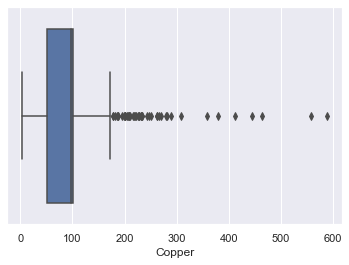

In [ ]:
sns.boxplot(x=df_a2_b2['Copper'])

In [ ]:
Q1 = df_a2_b2['Copper'].quantile(0.25)
Q3 = df_a2_b2['Copper'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Copper_outliers = df_a2_b2[(df_a2_b2['Copper'] < Q1 - whisker_width*IQR) | (df_a2_b2['Copper'] > Q3 + whisker_width*IQR)]
Copper_outliers.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
2,1012,1012,25594,M,1012,1012,1012,S,1.4,3.48,210.0,516.0,96.10,55.0,151.0,12.0,1012,D
17,131,131,19698,F,131,131,131,Y,11.4,2.80,588.0,961.0,280.55,200.0,283.0,12.4,131,D
21,673,673,20555,F,673,673,673,N,3.4,3.63,464.0,1376.0,120.90,55.0,173.0,11.6,673,D
22,264,264,20442,F,264,264,264,Y,17.4,2.94,558.0,6064.8,227.04,191.0,214.0,11.7,264,D
26,77,77,19884,F,77,77,77,S,21.6,3.31,221.0,3697.4,101.91,168.0,80.0,12.0,77,D


In [ ]:
Copper_mean = df_a2_b2['Copper'].mean()
Copper_std = df_a2_b2['Copper'].std()
low= Copper_mean -(3 * Copper_std)
high= Copper_mean + (3 * Copper_std)
Copper_outliers = df_a2_b2[(df_a2_b2['Copper'] < low) | (df_a2_b2['Copper'] > high)]
Copper_outliers

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
17,131,131,19698,F,131,131,131,Y,11.4,2.80,588.0,961.0,280.55,200.0,283.0,12.4,131,D
21,673,673,20555,F,673,673,673,N,3.4,3.63,464.0,1376.0,120.90,55.0,173.0,11.6,673,D
22,264,264,20442,F,264,264,264,Y,17.4,2.94,558.0,6064.8,227.04,191.0,214.0,11.7,264,D
119,2033,2033,12839,M,2033,2033,2033,N,3.5,3.98,444.0,766.0,130.20,210.0,344.0,10.6,2033,CL
183,974,974,13736,F,974,974,974,N,11.0,3.55,358.0,2412.0,167.40,140.0,471.0,9.8,974,D
232,1932,1932,15591,F,1932,1932,1932,N,0.9,3.06,412.0,2622.0,105.40,87.0,284.0,9.8,1932,C
252,1765,1765,28650,M,1765,1765,1765,N,7.1,3.03,380.0,983.0,158.10,154.0,97.0,11.2,1765,C


In [ ]:
Q1 = df_a2_b2['Copper'].quantile(0.25)
Q3 = df_a2_b2['Copper'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df_a2_b2['Copper']=np.where(df_a2_b2['Copper']>upper_whisker,upper_whisker,
                       np.where(df_a2_b2['Copper']<lower_whisker,lower_whisker,
                                df_a2_b2['Copper']))

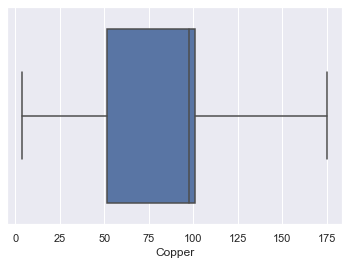

In [ ]:
sns.boxplot(x=df_a2_b2['Copper'])

Alk_Phos:

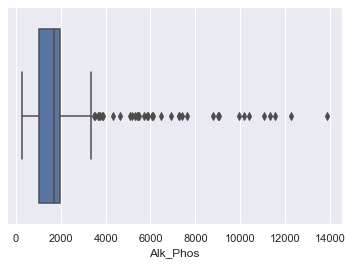

In [ ]:
sns.boxplot(x=df_a2_b2['Alk_Phos'])

In [ ]:
Q1 = df_a2_b2['Alk_Phos'].quantile(0.25)
Q3 = df_a2_b2['Alk_Phos'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Alk_Phos_outliers = df_a2_b2[(df_a2_b2['Alk_Phos'] < Q1 - whisker_width*IQR) | (df_a2_b2['Alk_Phos'] > Q3 + whisker_width*IQR)]
Alk_Phos_outliers.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
1,4500,4500,20617,F,4500,4500,4500,N,1.1,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,4500,C
3,1925,1925,19994,F,1925,1925,1925,S,1.8,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,1925,D
7,2466,2466,19379,F,2466,2466,2466,N,0.3,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,2466,D
14,3584,3584,23612,F,3584,3584,3584,N,0.8,3.87,173.0,9009.8,127.71,96.0,295.0,11.0,3584,D
22,264,264,20442,F,264,264,264,Y,17.4,2.94,175.0,6064.8,227.04,191.0,214.0,11.7,264,D


In [ ]:
Alk_Phos_mean = df_a2_b2['Alk_Phos'].mean()
Alk_Phos_std = df_a2_b2['Alk_Phos'].std()
low= Alk_Phos_mean -(3 * Alk_Phos_std)
high= Alk_Phos_mean + (3 * Alk_Phos_std)
Alk_Phos_outliers = df_a2_b2[(df_a2_b2['Alk_Phos'] < low) | (df_a2_b2['Alk_Phos'] > high)]
Alk_Phos_outliers

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
14,3584,3584,23612,F,3584,3584,3584,N,0.8,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,3584,D
30,3839,3839,15177,F,3839,3839,3839,N,4.7,3.44,114.0,9933.2,206.40,101.000000,195.0,10.3,3839,D
34,2847,2847,17758,F,2847,2847,2847,N,1.2,3.20,175.0,12258.8,72.24,151.000000,431.0,10.6,2847,D
38,2297,2297,20232,F,2297,2297,2297,N,0.7,3.00,52.0,9066.8,72.24,111.000000,563.0,10.6,2297,D
39,4467,4467,17046,F,4467,4467,4467,N,1.3,3.34,105.0,11046.6,104.49,124.702128,358.0,11.0,4467,C
41,4453,4453,12307,F,4453,4453,4453,N,2.1,3.54,122.0,8778.0,56.76,124.702128,344.0,11.0,4453,C
45,2256,2256,16728,F,2256,2256,2256,N,5.7,2.84,161.0,11552.0,136.74,165.000000,518.0,12.7,2256,D
47,4427,4427,17947,M,4427,4427,4427,N,1.9,3.70,175.0,10396.8,188.34,178.000000,214.0,11.0,4427,C
54,1360,1360,24020,M,1360,1360,1360,N,1.8,3.94,121.0,10165.0,79.98,219.000000,213.0,11.0,1360,D
55,1847,1847,12279,F,1847,1847,1847,N,1.1,3.80,88.0,13862.4,95.46,319.000000,365.0,10.6,1847,D


In [ ]:
df_a2_b2 = df_a2_b2.drop('Alk_Phos', axis=1)

SGOT:

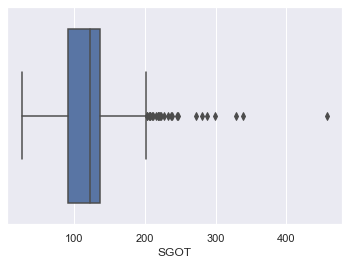

In [ ]:
sns.boxplot(x=df_a2_b2['SGOT'])

In [ ]:
Q1 = df_a2_b2['SGOT'].quantile(0.25)
Q3 = df_a2_b2['SGOT'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
SGOT_outliers = df_a2_b2[(df_a2_b2['SGOT'] < Q1 - whisker_width*IQR) | (df_a2_b2['SGOT'] > Q3 + whisker_width*IQR)]
SGOT_outliers.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
17,131,131,19698,F,131,131,131,Y,11.4,2.80,175.0,280.55,200.0,283.0,12.4,131,D
22,264,264,20442,F,264,264,264,Y,17.4,2.94,175.0,227.04,191.0,214.0,11.7,264,D
23,4079,4079,16261,M,4079,4079,4079,N,2.1,4.00,124.0,221.88,230.0,70.0,9.9,4079,D
30,3839,3839,15177,F,3839,3839,3839,N,4.7,3.44,114.0,206.40,101.0,195.0,10.3,3839,D
32,3170,3170,18731,F,3170,3170,3170,N,0.8,3.19,82.0,218.55,113.0,180.0,12.0,3170,D


In [ ]:
SGOT_mean = df_a2_b2['SGOT'].mean()
SGOT_std = df_a2_b2['SGOT'].std()
low= SGOT_mean -(3 * SGOT_std)
high= SGOT_mean + (3 * SGOT_std)
SGOT_outliers = df_a2_b2[(df_a2_b2['SGOT'] < low) | (df_a2_b2['SGOT'] > high)]
SGOT_outliers

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
17,131,131,19698,F,131,131,131,Y,11.4,2.80000,175.0,280.55,200.000000,283.0,12.4,131,D
66,2769,2769,18733,F,2769,2769,2769,N,1.1,3.91000,84.0,328.60,185.000000,261.0,10.0,2769,D
127,1037,1037,15322,F,1037,1037,1037,N,16.2,2.89000,42.0,299.15,124.702128,123.0,12.6,1037,D
165,2721,2721,15105,F,2721,2721,2721,N,5.7,3.26000,84.0,457.25,108.000000,213.0,9.5,2721,C
243,1690,1690,16374,F,1690,1690,1690,N,3.9,3.22000,121.0,272.80,231.000000,270.0,9.6,1690,D
280,41,41,24064,F,41,41,41,Y,17.9,2.45125,175.0,338.00,229.000000,62.0,12.9,41,D
304,1216,1216,15730,F,1216,1216,1216,N,2.9,3.61000,73.0,288.00,144.000000,275.0,10.6,1216,C


In [ ]:
Q1 = df_a2_b2['SGOT'].quantile(0.25)
Q3 = df_a2_b2['SGOT'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df_a2_b2['SGOT']=np.where(df_a2_b2['SGOT']>upper_whisker,upper_whisker,
                       np.where(df_a2_b2['SGOT']<lower_whisker,lower_whisker,
                                df_a2_b2['SGOT']))

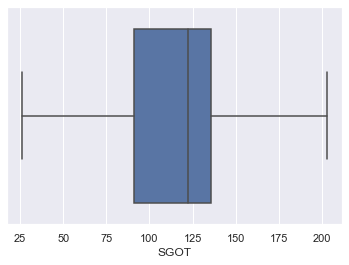

In [ ]:
sns.boxplot(x=df_a2_b2['SGOT'])

Tryglicerides:

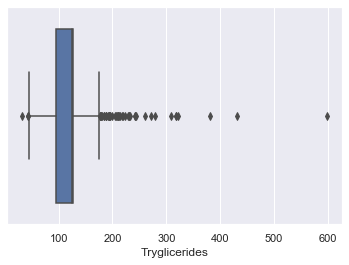

In [ ]:
sns.boxplot(x=df_a2_b2['Tryglicerides'])

In [ ]:
Q1 = df_a2_b2['Tryglicerides'].quantile(0.25)
Q3 = df_a2_b2['Tryglicerides'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Tryglicerides_outliers = df_a2_b2[(df_a2_b2['Tryglicerides'] < Q1 - whisker_width*IQR) | (df_a2_b2['Tryglicerides'] > Q3 + whisker_width*IQR)]
Tryglicerides_outliers.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
6,1832,1832,20284,F,1832,1832,1832,N,1.0,4.09,52.0,60.450,213.0,204.0,9.7,1832,C
7,2466,2466,19379,F,2466,2466,2466,N,0.3,4.00,52.0,28.380,189.0,373.0,11.0,2466,D
17,131,131,19698,F,131,131,131,Y,11.4,2.80,175.0,202.875,200.0,283.0,12.4,131,D
22,264,264,20442,F,264,264,264,Y,17.4,2.94,175.0,202.875,191.0,214.0,11.7,264,D
23,4079,4079,16261,M,4079,4079,4079,N,2.1,4.00,124.0,202.875,230.0,70.0,9.9,4079,D


In [ ]:
Tryglicerides_mean = df_a2_b2['Tryglicerides'].mean()
Tryglicerides_std = df_a2_b2['Tryglicerides'].std()
low= Tryglicerides_mean -(3 * Tryglicerides_std)
high= Tryglicerides_mean + (3 * Tryglicerides_std)
Tryglicerides_outliers = df_a2_b2[(df_a2_b2['Tryglicerides'] < low) | (df_a2_b2['Tryglicerides'] > high)]
Tryglicerides_outliers

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
55,1847,1847,12279,F,1847,1847,1847,N,1.1,3.80,88.0,95.46,319.0,365.0,10.6,1847,D
73,1827,1827,18964,F,1827,1827,1827,N,8.4,3.99,175.0,89.90,309.0,278.0,11.0,1827,D
74,1191,1191,15895,F,1191,1191,1191,S,17.1,2.53,175.0,182.90,598.0,268.0,11.5,1191,D
80,2540,2540,23107,F,2540,2540,2540,N,14.4,3.65,34.0,60.45,318.0,385.0,11.7,2540,D
115,3336,3336,22306,F,3336,3336,3336,S,3.0,3.63,74.0,106.95,382.0,438.0,9.9,3336,C
190,216,216,19246,F,216,216,216,N,24.5,3.35,175.0,147.25,432.0,399.0,15.2,216,D
240,837,837,15112,F,837,837,837,N,4.4,3.62,175.0,114.70,322.0,282.0,9.8,837,CL


In [ ]:
Q1 = df_a2_b2['Tryglicerides'].quantile(0.25)
Q3 = df_a2_b2['Tryglicerides'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df_a2_b2['Tryglicerides']=np.where(df_a2_b2['Tryglicerides']>upper_whisker,upper_whisker,
                       np.where(df_a2_b2['Tryglicerides']<lower_whisker,lower_whisker,
                                df_a2_b2['Tryglicerides']))

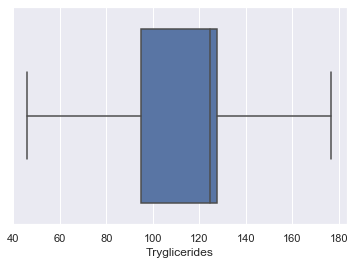

In [ ]:
sns.boxplot(x=df_a2_b2['Tryglicerides'])

Platelets:

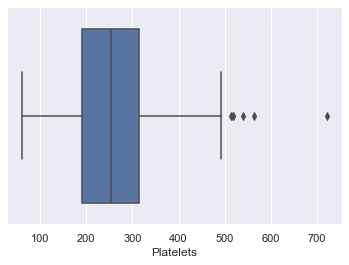

In [ ]:
sns.boxplot(x=df_a2_b2['Platelets'])

In [ ]:
Q1 = df_a2_b2['Platelets'].quantile(0.25)
Q3 = df_a2_b2['Platelets'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Platelets_outliers = df_a2_b2[(df_a2_b2['Platelets'] < Q1 - whisker_width*IQR) | (df_a2_b2['Platelets'] > Q3 + whisker_width*IQR)]
Platelets_outliers.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
38,2297,2297,20232,F,2297,2297,2297,N,0.7,3.00,52.000000,72.240000,111.000000,563.0,10.6,2297,D
45,2256,2256,16728,F,2256,2256,2256,N,5.7,2.84,161.000000,136.740000,165.000000,518.0,12.7,2256,D
181,2555,2555,20799,F,2555,2555,2555,N,0.6,3.69,161.000000,26.350000,124.702128,539.0,9.9,2555,C
201,2272,2272,22514,F,2272,2272,2272,N,0.5,3.80,15.000000,80.600000,89.000000,514.0,10.0,2272,C
333,466,466,20454,F,466,466,466,N,7.1,3.51,97.648387,122.556346,124.702128,721.0,11.8,466,D


In [ ]:
Platelets_mean = df_a2_b2['Platelets'].mean()
Platelets_std = df_a2_b2['Platelets'].std()
low= Platelets_mean -(3 * Platelets_std)
high= Platelets_mean + (3 * Platelets_std)
Platelets_outliers = df_a2_b2[(df_a2_b2['Platelets'] < low) | (df_a2_b2['Platelets'] > high)]
Platelets_outliers

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
38,2297,2297,20232,F,2297,2297,2297,N,0.7,3.00,52.000000,72.240000,111.000000,563.0,10.6,2297,D
333,466,466,20454,F,466,466,466,N,7.1,3.51,97.648387,122.556346,124.702128,721.0,11.8,466,D


In [ ]:
Q1 = df_a2_b2['Platelets'].quantile(0.25)
Q3 = df_a2_b2['Platelets'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df_a2_b2['Platelets']=np.where(df_a2_b2['Platelets']>upper_whisker,upper_whisker,
                       np.where(df_a2_b2['Platelets']<lower_whisker,lower_whisker,
                                df_a2_b2['Platelets']))

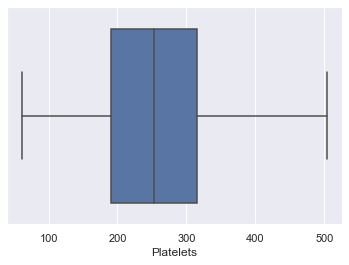

In [ ]:
sns.boxplot(x=df_a2_b2['Platelets'])

Prothrombin:

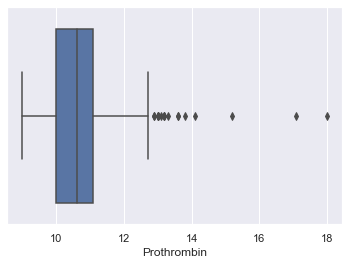

In [ ]:
sns.boxplot(x=df_a2_b2['Prothrombin'])

In [ ]:
Q1 = df_a2_b2['Prothrombin'].quantile(0.25)
Q3 = df_a2_b2['Prothrombin'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Prothrombin_outliers = df_a2_b2[(df_a2_b2['Prothrombin'] < Q1 - whisker_width*IQR) | (df_a2_b2['Prothrombin'] > Q3 + whisker_width*IQR)]
Prothrombin_outliers.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
11,304,304,21600,F,304,304,304,N,3.6,3.52,94.0,82.15,95.000,71.0,13.6,304,D
19,1356,1356,21898,F,1356,1356,1356,N,5.1,3.51,140.0,122.45,135.000,322.0,13.0,1356,D
27,549,549,16417,F,549,549,549,Y,17.2,3.23,175.0,189.10,176.875,144.0,13.0,549,D
60,4256,4256,16034,M,4256,4256,4256,N,0.6,3.94,28.0,60.45,176.875,211.0,13.0,4256,C
61,3090,3090,22173,F,3090,3090,3090,N,1.3,2.75,58.0,43.40,112.000,329.0,13.2,3090,D


In [ ]:
Prothrombin_mean = df_a2_b2['Prothrombin'].mean()
Prothrombin_std = df_a2_b2['Prothrombin'].std()
low= Prothrombin_mean -(3 * Prothrombin_std)
high= Prothrombin_mean + (3 * Prothrombin_std)
Prothrombin_outliers = df_a2_b2[(df_a2_b2['Prothrombin'] < low) | (df_a2_b2['Prothrombin'] > high)]
Prothrombin_outliers

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
106,3388,3388,22836,F,3388,3388,3388,N,0.6,4.03,10.000000,71.300000,77.000000,316.00000,17.1,3388,C
153,140,140,25340,M,140,140,140,Y,2.4,2.56,175.000000,120.900000,75.000000,108.00000,14.1,140,D
190,216,216,19246,F,216,216,216,N,24.5,3.35,175.000000,147.250000,176.875000,399.00000,15.2,216,D
324,4795,4795,12419,F,4795,4795,4795,N,1.8,3.24,97.648387,122.556346,124.702128,257.02457,18.0,4795,C
337,791,791,17167,F,791,791,791,N,16.0,3.42,97.648387,122.556346,124.702128,475.00000,13.8,791,D


In [ ]:
Q1 = df_a2_b2['Prothrombin'].quantile(0.25)
Q3 = df_a2_b2['Prothrombin'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df_a2_b2['Prothrombin']=np.where(df_a2_b2['Prothrombin']>upper_whisker,upper_whisker,
                       np.where(df_a2_b2['Prothrombin']<lower_whisker,lower_whisker,
                                df_a2_b2['Prothrombin']))

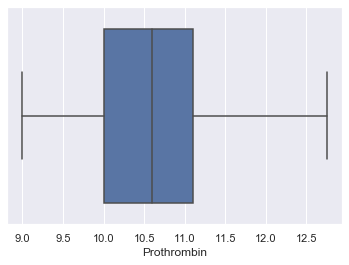

In [ ]:
sns.boxplot(x=df_a2_b2['Prothrombin'])

# Save the cleaned data as a csv file

In [ ]:
df_a2_b2.to_csv('data_cleaned.csv', index=False)

In [ ]:
df = pd.read_csv('data_cleaned.csv')

In [ ]:
df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,400,400,21464,F,400,400,400,Y,14.5,2.60,156.0,137.95,172.0,190.0,12.2,400,D
1,4500,4500,20617,F,4500,4500,4500,N,1.1,4.14,54.0,113.52,88.0,221.0,10.6,4500,C
2,1012,1012,25594,M,1012,1012,1012,S,1.4,3.48,175.0,96.10,55.0,151.0,12.0,1012,D
3,1925,1925,19994,F,1925,1925,1925,S,1.8,2.54,64.0,60.63,92.0,183.0,10.3,1925,D
4,1504,1504,13918,F,1504,1504,1504,N,3.4,3.53,143.0,113.15,72.0,136.0,10.9,1504,CL


In [ ]:
df.info()